In [1]:
import pandas as pd
import pickle
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

rnd_state = 42

In [2]:
with open("../../tmp/dataset/dataset1.pickle", "rb") as f:
    df = pickle.load(f)

In [3]:
df.head()

,generic_fileSize,generic_fileEntropy,header_SizeOfHeaders,header_AddressOfEntryPoint,header_ImageBase,header_SizeOfImage,header_SizeOfCode,header_SizeOfInitializedData,header_SizeOfUninitializedData,header_BaseOfCode,...,pesection_12_exists,pesection_12_isStandard,pesection_13_exists,pesection_13_isStandard,pesection_14_exists,pesection_14_isStandard,pesection_15_exists,pesection_15_isStandard,pesection_16_exists,pesection_16_isStandard
sample_hash,,,,,,,,,,,,,,,,,,,,,
cfa2d5eeac7de9f134cb2e36d54a5c4053f62fdf9d5302994557da1287719414,1666137,7.996651,1024,5358807,4194304,5365760,310272,56832,0,4096,...,True,False,False,False,False,False,False,False,False,False
00ebebc75f61527282cee19ab7aed80693b63fbb969e7154d17838f9dd08db2f,10543104,4.821304,4096,4512,4194304,118784,94208,20480,0,4096,...,False,False,False,False,False,False,False,False,False,False
f45e6ca3a2bbbaa1c514d81abe9daaa47f7d41da500e6933f61adf29f5f39835,57368,4.979988,4096,9759,4194304,57344,8192,45056,0,4096,...,False,False,False,False,False,False,False,False,False,False
d694a203bb211751669f8742db877e8ebd5eff5b126abc4c3e59cdb81f9dbb56,7922688,7.950081,1024,155508,4194304,7950336,570880,7350784,0,4096,...,False,False,False,False,False,False,False,False,False,False
15c9feb810c48ffef1c7e32cbe58a11037da94e958fb1f34e8feca1643dd80eb,159744,5.911521,4096,86524,4194304,159744,86016,69632,0,4096,...,False,False,False,False,False,False,False,False,False,False


In [4]:
#df = df.drop("pesectionProcessed_entrypointSection_name", axis=1)

# Check if any column is of type bool
is_bool_column = df.dtypes == 'bool'
bool_cols = df.columns[is_bool_column]

for bool_col in bool_cols:
    df[bool_col] = df[bool_col].astype(int)

In [15]:
df = df.drop("pesectionProcessed_entrypointSection_name", axis=1)

In [5]:
# X = df.iloc[:, :10]
# sns.pairplot(pd.DataFrame(X))

In [21]:
param_grid = {'n_clusters': list(range(2, 10))}
sil_thr = 0  # visualize results only for combinations with silhouette above the threshold
# unc_thr = 33 # visualize results only for combinations with unclustered% below the threshold
unc_thr = 10 # visualize results only for combinations with unclustered% below the threshold
params = list(ParameterGrid(param_grid))

In [16]:
from sklearn.cluster import AgglomerativeClustering
from plot_clusters import plot_clusters

In [17]:
X = df

In [18]:
X = X.to_numpy()

In [9]:
# # print("{:}\t{:}\t{:}\t{:}\t{:}".\
# #       format('eps','min_samples',' n_clusters',' silhouette', 'unclust%'))
# for i in range(len(params)):
#     clustering = AgglomerativeClustering(**(params[i]))
#     y_db = clustering.fit_predict(X)
#     cluster_labels_all = np.unique(y_db)
#     cluster_labels = cluster_labels_all[cluster_labels_all != -1]
    
#     n_clusters = len(cluster_labels)
#     if n_clusters > 1:
#         X_cl = X[y_db != -1, :]
#         y_db_cl = y_db[y_db != -1]
#         silhouette = silhouette_score(X_cl, y_db_cl)
#         uncl_p = (1 - y_db_cl.shape[0] / y_db.shape[0]) * 100
#         if silhouette > sil_thr and uncl_p < unc_thr:
#             print(f"{n_clusters}, {silhouette}, {uncl_p}")

In [10]:
from scipy.cluster.hierarchy import dendrogram

In [11]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

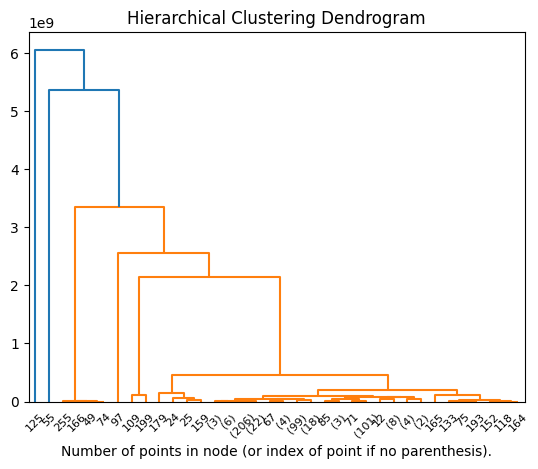

In [20]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()